In [1]:
import numpy as np
import skfuzzy as fuzzy

In [2]:
import matplotlib.pyplot as plt
from matplotlib import *

In [3]:
# step 1 Define the linguistic variables.
mean_delay = np.arange(0.0, 0.8, 0.1)
print(mean_delay)
num_of_servers = np.arange(0.0, 1.1, 0.1)
print(num_of_servers)
repair_utilization = np.arange(0.0, 1.1, 0.1)
print(repair_utilization)
num_of_spares = np.arange(0.0, 1.1, 0.1)
print(num_of_spares)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
mean_delay_vs = fuzzy.trapmf(mean_delay, [0.0, 0.0, 0.1, 0.3])
mean_delay_s = fuzzy.trimf(mean_delay, [0.1, 0.3, 0.5])
mean_delay_m = fuzzy.trapmf(mean_delay, [0.4, 0.6, 0.7, 0.7])

num_of_servers_s = fuzzy.trapmf(num_of_servers, [0.0, 0.0, 0.17, 0.35])
num_of_servers_m = fuzzy.trimf(num_of_servers, [0.3, 0.5, 0.7])
num_of_servers_l = fuzzy.trapmf(num_of_servers, [0.6, 0.8, 1.0, 1.0])

repair_utilization_l = fuzzy.trapmf(repair_utilization, [0.0, 0.0, 0.4, 0.6])
repair_utilization_m = fuzzy.trimf(repair_utilization, [0.4, 0.6, 0.8])
repair_utilization_h = fuzzy.trapmf(repair_utilization, [0.6, 0.8, 1.0, 1.0])

num_of_spares_vs = fuzzy.trapmf(num_of_spares, [0.0, 0.0, 0.1, 0.3])
num_of_spares_s = fuzzy.trimf(num_of_spares, [0.0, 0.2, 0.4])
num_of_spares_rs = fuzzy.trimf(num_of_spares, [0.25, 0.35, 0.45])
num_of_spares_m = fuzzy.trimf(num_of_spares, [0.3, 0.5, 0.7])
num_of_spares_rl = fuzzy.trimf(num_of_spares, [0.55, 0.65, 0.75])
num_of_spares_l = fuzzy.trimf(num_of_spares, [0.6, 0.8, 1.0])
num_of_spares_vl = fuzzy.trapmf(num_of_spares, [0.7, 0.9, 1.0, 1.0])




<IPython.core.display.Javascript object>


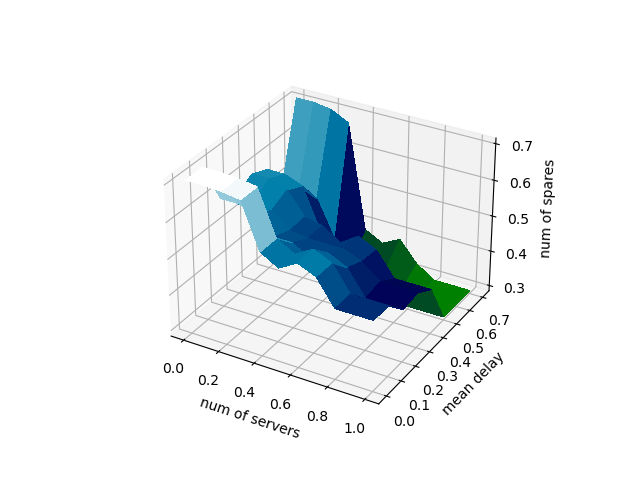

Text(0.5, 0, 'num of spares')

In [7]:
X = num_of_servers.reshape((len(num_of_servers), 1))
Y = mean_delay.reshape((1, len(mean_delay)))
Z = np.zeros((len(num_of_servers), len(mean_delay)))
X = X.astype(np.float)
Y = Y.astype(np.float)
Z = Z.astype(np.float)

for ns in range(len(num_of_servers)):
    for md in range(len(mean_delay)):
        data_ns = num_of_servers[ns]
        data_md = mean_delay[md]

        num_of_servers_s_n = fuzzy.interp_membership(num_of_servers, num_of_servers_s, data_ns)
        num_of_servers_m_n = fuzzy.interp_membership(num_of_servers, num_of_servers_m, data_ns)
        num_of_servers_l_n = fuzzy.interp_membership(num_of_servers, num_of_servers_l, data_ns)
        mean_delay_vs_n = fuzzy.interp_membership(mean_delay, mean_delay_vs, data_md)
        mean_delay_s_n = fuzzy.interp_membership(mean_delay, mean_delay_s, data_md)
        mean_delay_m_n = fuzzy.interp_membership(mean_delay, mean_delay_m, data_md)
        
        #vs
        keep_vs = max([num_of_servers_l_n, mean_delay_m_n])
        result_vs = np.fmin(keep_vs, num_of_spares_vs)
        #s
        keep_s = max([max(mean_delay_m_n, num_of_servers_m_n), max(mean_delay_s_n, num_of_servers_l_n)])
        result_s = np.fmin(keep_s, num_of_spares_s)
        #rs
        keep_rs = max([num_of_servers_m_n, mean_delay_s_n])
        result_rs = np.fmin(keep_rs, num_of_spares_rs)
        #m
        keep_m = max([max(num_of_servers_l_n, mean_delay_vs_n), max(num_of_servers_s_n, mean_delay_m_n)])
        result_m = np.fmin(keep_m, num_of_spares_m)
        #rl
        keep_rl = max([num_of_servers_m_n, mean_delay_vs_n])
        result_rl = np.fmin(keep_rl, num_of_spares_rl)
        #l
        keep_l = max([num_of_servers_s_n, mean_delay_s_n])
        result_l = np.fmin(keep_l, num_of_spares_l)
        #vl
        keep_vl = max([num_of_servers_s_n, mean_delay_vs_n])
        result_vl = np.fmin(keep_vl, num_of_spares_vl)
        
        aggregation = np.fmax(result_vs, 
                              np.fmax(result_s, 
                                      np.fmax(result_rs, 
                                              np.fmax(result_m, 
                                                      np.fmax(result_rl, 
                                                              np.fmax(result_l, result_vl))))))
        
        Z[ns, md] = fuzzy.defuzz(num_of_spares, aggregation, 'centroid')
        
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax1.set_xlabel('num of servers')
ax1.set_ylabel('mean delay')
ax1.set_zlabel('num of spares')
        

<IPython.core.display.Javascript object>


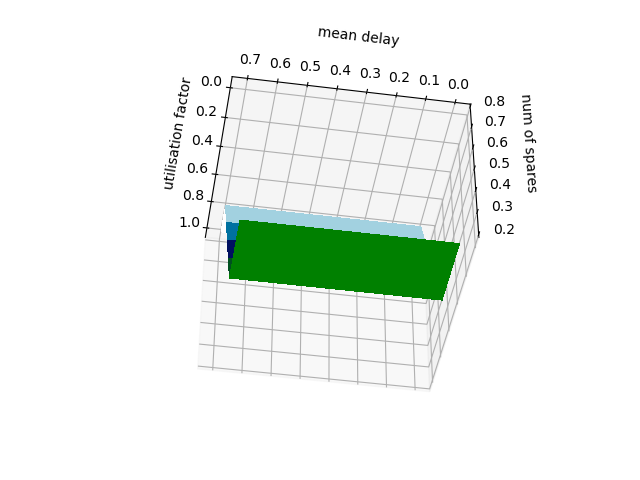

Text(0.5, 0, 'num of spares')

In [6]:
X = repair_utilization.reshape((len(repair_utilization), 1))
Y = mean_delay.reshape((1, len(mean_delay)))
Z = np.zeros((len(repair_utilization), len(mean_delay)))
X = X.astype(np.float)
Y = Y.astype(np.float)
Z = Z.astype(np.float)

for ns in range(len(repair_utilization)):
    for md in range(len(mean_delay)):
        data_ns = repair_utilization[ns]
        data_md = mean_delay[md]
        
        repair_utilization_l_n = fuzzy.interp_membership(repair_utilization, repair_utilization_l, data_ns)
        repair_utilization_m_n = fuzzy.interp_membership(repair_utilization, repair_utilization_m, data_ns)
        repair_utilization_h_n = fuzzy.interp_membership(repair_utilization, repair_utilization_h, data_ns)
        
        mean_delay_vs_n = fuzzy.interp_membership(mean_delay, mean_delay_vs, data_md)
        mean_delay_s_n = fuzzy.interp_membership(mean_delay, mean_delay_s, data_md)
        mean_delay_m_n = fuzzy.interp_membership(mean_delay, mean_delay_m, data_md)
        
        #s
        keep_s = max([0, repair_utilization_l_n])
        result_s = np.fmin(keep_s, num_of_spares_s)
        
        #m
        keep_m = max([0, repair_utilization_m_n])
        result_m = np.fmin(keep_m, num_of_spares_m)
        
        #l
        keep_l = max([0, repair_utilization_h_n])
        result_l = np.fmin(keep_l, num_of_spares_l)
        
        aggregation = np.fmax(result_s, np.fmax(result_m, result_l))
        
        Z[ns, md] = fuzzy.defuzz(num_of_spares, aggregation, 'centroid')
        
        
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax1.set_xlabel('utilisation factor')
ax1.set_ylabel('mean delay')
ax1.set_zlabel('num of spares')


